In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [5]:
demo_df = pd.read_excel("../assets/demo.xlsx")

In [6]:
cols = {"Age":"age", "Gender":"gender", "Marital Status":"marital_status", "Address":"address",
       "Income":"income","Income Category":"income_category", "Job Category":"job_category",}

demo_df.rename(columns=cols, inplace=True)

In [7]:
demo_df.columns

Index(['age', 'gender', 'marital_status', 'address', 'income',
       'income_category', 'job_category'],
      dtype='object')

In [8]:
demo_df.describe() #will only give us numerical values

age     address      income  income_category  job_category
count  200.000000  200.000000  200.000000       200.000000    200.000000
mean    42.475000   11.485000   76.305000         2.520000      1.950000
std     12.801122   10.365665  107.554647         1.065493      0.781379
min     19.000000    0.000000   11.000000         1.000000      1.000000
25%     32.000000    3.000000   27.000000         2.000000      1.000000
50%     43.000000    9.000000   44.500000         2.000000      2.000000
75%     51.000000   17.000000   76.000000         4.000000      3.000000
max     76.000000   51.000000  873.000000         4.000000      3.000000

In [9]:
?demo_df.describe

Signature: demo_df.describe(percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtypes : Limits 

In [10]:
demo_df.select_dtypes(include=["object"])

gender marital_status
0        f              1
1        m              0
2        f      no answer
3        m              1
4        m      no answer
..     ...            ...
195      f              0
196      f              1
197      f              1
198      m              0
199      m              0

[200 rows x 2 columns]

In [11]:
demo_df.select_dtypes(include=["object"]).describe()

gender  marital_status
count     200             200
unique      4               3
top         f               0
freq       99             102

In [12]:
demo_df["gender"].value_counts().index

Index(['f', 'm', '  f', '   m'], dtype='object', name='gender')

In [13]:
demo_df.gender.unique()

array(['f', 'm', '  f', '   m'], dtype=object)

In [14]:
?demo_df.replace

Signature:
demo_df.replace(
    to_replace=None,
    value=<no_default>,
    *,
    inplace: 'bool_t' = False,
    limit: 'int | None' = None,
    regex: 'bool_t' = False,
    method: "Literal['pad', 'ffill', 'bfill'] | lib.NoDefault" = <no_default>,
) -> 'Self | None'
Docstring:
Replace values given in `to_replace` with `value`.

Values of the Series/DataFrame are replaced with other values dynamically.
This differs from updating with ``.loc`` or ``.iloc``, which require
you to specify a location to update with some value.

Parameters
----------
to_replace : str, regex, list, dict, Series, int, float, or None
    How to find the values that will be replaced.

    * numeric, str or regex:

        - numeric: numeric values equal to `to_replace` will be
          replaced with `value`
        - str: string exactly matching `to_replace` will be replaced
          with `value`
        - regex: regexs matching `to_replace` will be replaced with
          `value`

    * list of str, regex, 

In [15]:
demo_df2 = demo_df.replace(to_replace="  f", value="f")

In [16]:
demo_df2.gender.unique()

array(['f', 'm', '   m'], dtype=object)

In [17]:
gender_col = demo_df2.gender.replace(to_replace="   m", value="m")
gender_col

0      f
1      m
2      f
3      m
4      m
      ..
195    f
196    f
197    f
198    m
199    m
Name: gender, Length: 200, dtype: object

In [18]:
gender_col.unique()

array(['f', 'm'], dtype=object)

In [19]:
demo_df2["gender"] = gender_col

In [20]:
demo_df2.gender.unique()

array(['f', 'm'], dtype=object)

In [21]:
demo_df2.marital_status.unique()

array([1, 0, 'no answer'], dtype=object)

In [22]:
demo_df2.marital_status.value_counts()

marital_status
0            102
1             93
no answer      5
Name: count, dtype: int64

In [23]:
?demo_df2.select_dtypes

Signature: demo_df2.select_dtypes(include=None, exclude=None) -> 'Self'
Docstring:
Return a subset of the DataFrame's columns based on the column dtypes.

Parameters
----------
include, exclude : scalar or list-like
    A selection of dtypes or strings to be included/excluded. At least
    one of these parameters must be supplied.

Returns
-------
DataFrame
    The subset of the frame including the dtypes in ``include`` and
    excluding the dtypes in ``exclude``.

Raises
------
ValueError
    * If both of ``include`` and ``exclude`` are empty
    * If ``include`` and ``exclude`` have overlapping elements
    * If any kind of string dtype is passed in.

See Also
--------
DataFrame.dtypes: Return Series with the data type of each column.

Notes
-----
* To select all *numeric* types, use ``np.number`` or ``'number'``
* To select strings you must use the ``object`` dtype, but note that
  this will return *all* object dtype columns
* See the `numpy dtype hierarchy
  <https://numpy.org/doc/

In [24]:
demo_df2.select_dtypes(include=["number"]) #"float64","int64"

age  address  income  income_category  job_category
0     55       12      72                3             3
1     56       29     153                4             3
2     28        9      28                2             1
3     24        4      26                2             1
4     25        2      23                1             2
..   ...      ...     ...              ...           ...
195   45        3      86                4             3
196   23        2      27                2             1
197   66       32      11                1             2
198   49        4      30                2             1
199   45        1     147                4             3

[200 rows x 5 columns]

In [25]:
demo_df2.isna().sum()

age                0
gender             0
marital_status     0
address            0
income             0
income_category    0
job_category       0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x761605910c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7616059111b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7616059109d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7616059116f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x761605911990>],
 'means': []}

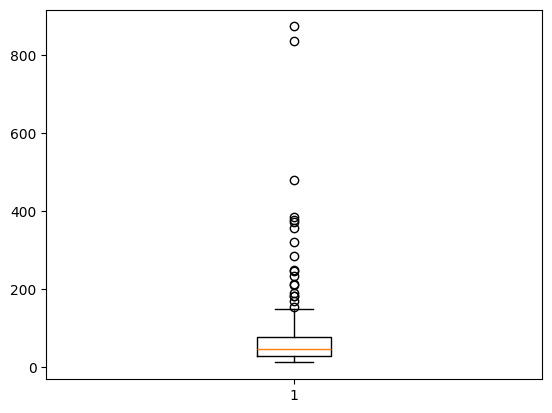

In [26]:
plt.boxplot(demo_df2["income"])

In [27]:
#exercise: function to calucate outliers:
#lower fence = Q1 - 1.5(Q3-Q1)
#upper fence = Q3 + 1.5(Q3-Q1)

In [28]:
?np.percentile

Signature:      
np.percentile(
    a,
    q,
    axis=None,
    out=None,
    overwrite_input=False,
    method='linear',
    keepdims=False,
    *,
    interpolation=None,
)
Call signature:  np.percentile(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function percentile at 0x761620dc0ee0>
File:            ~/venvs/dataanalysis/lib/python3.10/site-packages/numpy/lib/function_base.py
Docstring:      
Compute the q-th percentile of the data along the specified axis.

Returns the q-th percentile(s) of the array elements.

Parameters
----------
a : array_like of real numbers
    Input array or object that can be converted to an array.
q : array_like of float
    Percentage or sequence of percentages for the percentiles to compute.
    Values must be between 0 and 100 inclusive.
axis : {int, tuple of int, None}, optional
    Axis or axes along which the percentiles are computed. The
    default is to compute the percentile(s) along a flattened
    version of t

In [29]:
?np.quantile

Signature:      
np.quantile(
    a,
    q,
    axis=None,
    out=None,
    overwrite_input=False,
    method='linear',
    keepdims=False,
    *,
    interpolation=None,
)
Call signature:  np.quantile(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function quantile at 0x761620dc1000>
File:            ~/venvs/dataanalysis/lib/python3.10/site-packages/numpy/lib/function_base.py
Docstring:      
Compute the q-th quantile of the data along the specified axis.

.. versionadded:: 1.15.0

Parameters
----------
a : array_like of real numbers
    Input array or object that can be converted to an array.
q : array_like of float
    Probability or sequence of probabilities for the quantiles to compute.
    Values must be between 0 and 1 inclusive.
axis : {int, tuple of int, None}, optional
    Axis or axes along which the quantiles are computed. The default is
    to compute the quantile(s) along a flattened version of the array.
out : ndarray, optional
    Alternat

In [30]:
?np.where

Call signature:  np.where(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <built-in function where>
Docstring:      
where(condition, [x, y], /)

Return elements chosen from `x` or `y` depending on `condition`.

.. note::
    When only `condition` is provided, this function is a shorthand for
    ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
    preferred, as it behaves correctly for subclasses. The rest of this
    documentation covers only the case where all three arguments are
    provided.

Parameters
----------
condition : array_like, bool
    Where True, yield `x`, otherwise yield `y`.
x, y : array_like
    Values from which to choose. `x`, `y` and `condition` need to be
    broadcastable to some shape.

Returns
-------
out : ndarray
    An array with elements from `x` where `condition` is True, and elements
    from `y` elsewhere.

See Also
--------
choose
nonzero : The function that is called when x and y are omitted

Notes


In [31]:
def getOutliers(column):

    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    interquantile_range = q3-q1
    lower_fence = q1 - 1.5*interquantile_range
    upper_fence = q3 + 1.5*interquantile_range

    outlier_indicies = np.where((column < lower_fence) | (column > upper_fence))[0]
    outliers = np.array(column[outlier_indicies])
    return outliers, outlier_indicies
    

In [32]:
outliers, indexes = getOutliers(demo_df2.income)

In [33]:
?demo_df2.drop

Signature:
demo_df2.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label o

In [34]:
demo_df3 = demo_df2.drop(indexes)

(array([ 7., 12., 11., 17., 11., 10., 10., 17., 14., 18., 14., 17., 14.,
         6.,  7.,  6.,  5.,  2.,  1.,  1.]),
 array([19.  , 21.85, 24.7 , 27.55, 30.4 , 33.25, 36.1 , 38.95, 41.8 ,
        44.65, 47.5 , 50.35, 53.2 , 56.05, 58.9 , 61.75, 64.6 , 67.45,
        70.3 , 73.15, 76.  ]),
 <BarContainer object of 20 artists>)

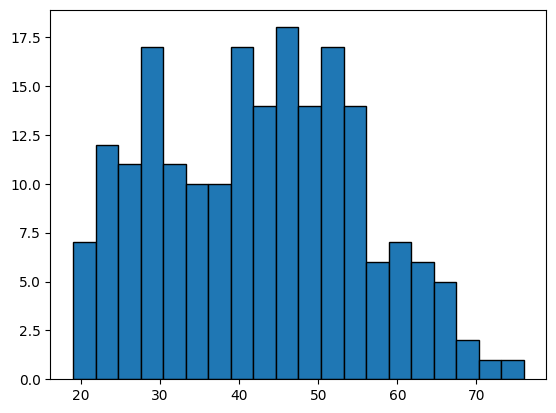

In [35]:
plt.hist(demo_df2.age, bins = 20, edgecolor = "black")

(array([11., 24., 37., 12., 18., 18.,  8.,  9.,  9.,  9.,  6.,  2.,  2.,
         2.,  4.,  2.,  0.,  1.,  2.,  5.]),
 array([ 11.  ,  17.85,  24.7 ,  31.55,  38.4 ,  45.25,  52.1 ,  58.95,
         65.8 ,  72.65,  79.5 ,  86.35,  93.2 , 100.05, 106.9 , 113.75,
        120.6 , 127.45, 134.3 , 141.15, 148.  ]),
 <BarContainer object of 20 artists>)

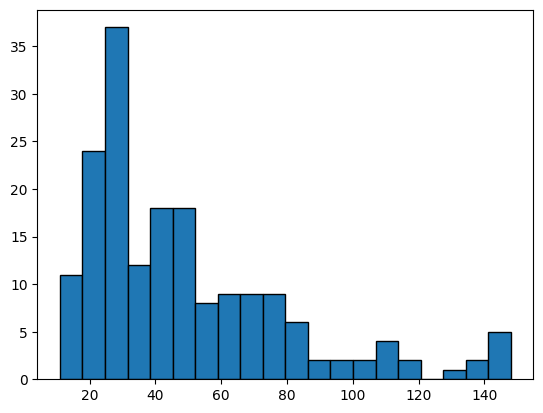

In [36]:
plt.hist(demo_df3.income, bins=20, edgecolor="black")

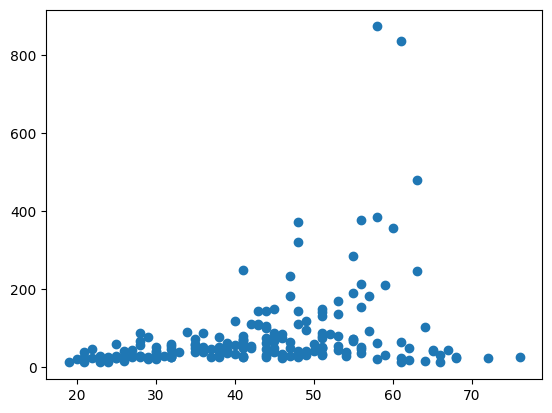

In [37]:
plt.scatter(demo_df2.age, demo_df2.income)

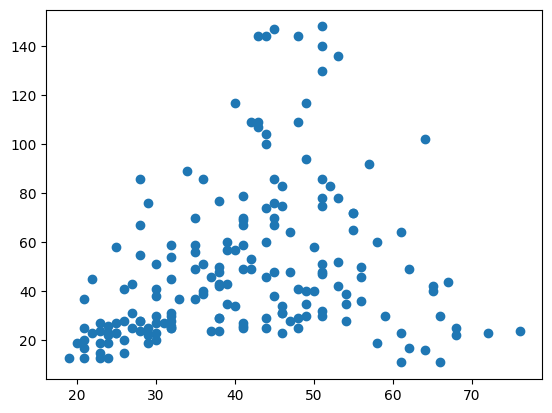

In [38]:
plt.scatter(demo_df3.age, demo_df3.income)

In [39]:
demo_df2 = demo_df2[demo_df.income<600]

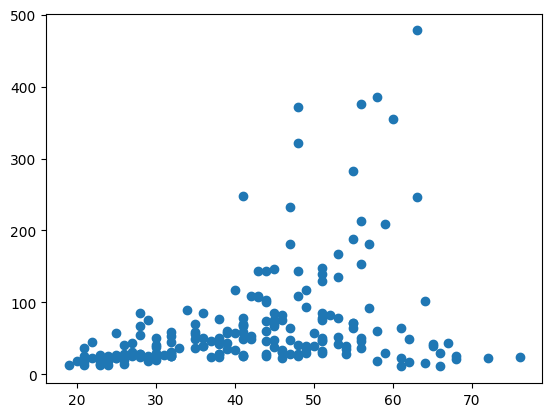

In [40]:
plt.scatter(demo_df2.age, demo_df2.income)

In [41]:
demo_df2.isna().sum()

age                0
gender             0
marital_status     0
address            0
income             0
income_category    0
job_category       0
dtype: int64

In [43]:
demo_df4 = demo_df2[demo_df2.marital_status != 'no answer']

In [44]:
demo_df4.sample(n=5)

age gender marital_status  address  income  income_category  job_category
59    28      m              0        9      28                2             2
191   60      m              1       18     355                4             3
156   43      m              1        5     144                4             3
107   22      f              0        3      23                1             1
16    45      f              0        4      48                2             2

In [45]:
demo_df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              193 non-null    int64 
 1   gender           193 non-null    object
 2   marital_status   193 non-null    object
 3   address          193 non-null    int64 
 4   income           193 non-null    int64 
 5   income_category  193 non-null    int64 
 6   job_category     193 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 12.1+ KB


In [49]:
demo_df4['marital_status'] = demo_df4.marital_status.astype('int')

/tmp/ipykernel_43252/3830552712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_df4['marital_status'] = demo_df4.marital_status.astype('int')


In [59]:
demo_df5 = demo_df4.copy()

In [60]:
demo_df5 = pd.get_dummies(data=demo_df5, 
                          columns=['gender'], 
                          drop_first=True, 
                          dtype='int'
                         )

In [66]:
logistic_regression_model = LogisticRegression()

In [67]:
X = demo_df5.drop('marital_status', axis=1)
y = demo_df5.marital_status

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [84]:
logistic_regression_model.fit(X, y)

LogisticRegression()

In [85]:
logistic_regression_model.score(X, y) * 100

54.40414507772021

In [86]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [87]:
logistic_regression_model.score(X_test, y_test)

0.5306122448979592

In [91]:
demo_df2[demo_df2.marital_status == 'no answer']

age gender marital_status  address  income  income_category  job_category
2   28      f      no answer        9      28                2             1
4   25      m      no answer        2      23                1             2
7   46      m      no answer       20      75                4             3
8   41      m      no answer       10      26                2             2
9   29      f      no answer        4      19                1             2

In [92]:
X_train.head(n=1)

age  address  income  income_category  job_category  gender_m
23   65       17      42                2             3         1

In [93]:
logistic_regression_model.predict(X=[[28, 9, 28, 2, 1, 0]])

/home/jumashafara/venvs/dataanalysis/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [90]:
logistic_regression_model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1])

In [95]:
decision_tree_classifier = DecisionTreeClassifier()

In [96]:
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
decision_tree_classifier.score(X_test, y_test)

0.5102040816326531

In [98]:
decision_tree_classifier.predict(X=[[28, 9, 28, 2, 1, 0]])

/home/jumashafara/venvs/dataanalysis/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [99]:
decision_tree_classifier.predict(X=X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1])

In [ ]:
# take in X_test, y_test
# predictions on X_test
# true values ie y_test
# match which are correct
# correct/total